# __Generation of genetic DFNs (the UFM model)__


### Problem statement

We define a process to generate DFN that takes into account the physical interaction between fractures, following the UFM (Universal Fracture Model) model. 

<center>
<div>
<img src="https://gitlab.com/fractorylab/dfnlab/-/raw/master/Tutorials/img/ufm_generator.png" width="1000"/>
</div>
<br>
From genetic rules to DFN realizations
</center>

### Theoretical background
The UFM model is a genetic DFN model, based on three simplified kinematic rules, mimicking the fracture growth process _[[Davy et al. 2010](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2009JB007043), [Davy et al. 2013](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/jgrb.50120)]_:
<br>
- __Nucleation__: the fracture birth process. Nuclei are introduced in the system at constant rate $\dot{n}$ (number of nuclei per unit volume per unit time)
<br>
- __Propagation__: the fracture growth law. Once created, fractures grow following a power-law relationship between the fracture growth speed $v$ and the fracture size $l$, to describe the crack tip velocity in the subcritical regime (Charles' law):
$$v(l)=C \cdot l^a$$
with $C$ the growth rate, and $a$ the growth exponent
<br>
- __Arrest__: the arrest rule is assumed to reflect the mechanical interaction between fractures. In this model, we consider these interactions as a binary law where fractures can only terminate against larger ones, but the reverse cannot occur.

With simple kinematic rules that mimic the main mechanical processes, the model produces fracture size distributions and fracture  T intersections consistent with field observations. The T-intersections resulting from such generation process cannot be produced in purely stochastic models. The UFM processes result in a broken power-law fracture size distribution. Small fractures grow without interaction with other fractures, which leads to a dilute regime, where the fracture size distribution $n_{dilute}(l)$ follow this equation :
$$n_{dilute}(l)=\frac{\dot{n}}{C} \cdot l^{-a}$$
Larger fractures interact and terminate against one another, leading to a likely universal power-law size distribution $n_{dense}(l)$, corresponding to what we call the dense regime :
$$n_{dense}(l)=\alpha_{D} \cdot l^{-4}$$
with $\alpha_{D}$ a density term that mainly depend on fracture orientations. These two regimes are separated by a transition scale $l_{c}$.

### What will you learn ?
- Generate a simple UFM model using target metrics
- Generate a UFM model using growth parameters

### DFN.Lab model

The implemented UFM model needs the following parameters:

- Statistical nuclei distributions :
  - Positions: uniform, fractal or bootstrapped
  - Orientations: uniform, Fisher or bootstrapped
  - Nuclei size distribution (uniform, power-law, exponential, bootstrapped)
  - Nuclei rate $\dot{n}$


- Growth parameters :
    - Growth exponent $a$
    - Growth rate $C$
    

- Intersections parameters :
    - Nuclei suppression mode: 0=keep all, 1=remove nuclei if it intersects a larger fracture, 2=remove nuclei if intersect existing fracture
    - T_mode : intersection mode. 0=constant intersection size (applied during the run), 1=proportional to fracture size (applied during the run), 2=constant intersection size (applied after the run), 3=proportional to fracture size (applied after the run)
    - T_length: can be either the size of T intersection (T_mode=0 or 2) or the proportionality coefficient (T_mode=1 or 3)
    - T_side: same as T_length for fractures intersecting another fracture on its side
   
   
- Model parameters :
    - Output filename and type
    - Number of steps: number of nuclei introduced at each computation step. A large number of nuclei fasten computations (default is 10nuclei).
    - Number of threads. This allows to fasten computations. The default value is -1 (which means all).
    - Dimensionless ending time $t_{end}^{*}$ (dimensionless time $t^{*}=1$ corresponds to the time for the first fracture to become infinite). Default 1.
    
<br>
You should be familiar with tutorial "Stochastic DFN generation".

The required modules is __UFMGenerator__.

In [1]:
import dfnlab.UFMGenerator as ufmgenerator

_____________

## Create a UFM DFN using "process" parameters
You can create a UFM DFN using "process" parameters described above.

First, we initialize the system, made of a cubic domain and an empty DFN.

In [2]:
import dfnlab.System as sys
import dfnlab.Domains as dom
import dfnlab.Fractures as dfn

system = sys.System()
domain = dom.Domain()
domain.buildParallelepiped(center=[0, 0, 0], L1=60.)
system.setDomain(domain)
fnet = dfn.DFN()
system.setDFN(fnet)

We first create a _UFMGenerator_ object.

In [3]:
generator = ufmgenerator.UFMGenerator(system, seed=1)

We set global parameters such as step number, number of threads, and dimensionless ending time.

In [4]:
generator.setGlobalParameters(numsteps=100,numthreads=4,dimensionlessend=1.)

We set the nuclei size (minimum fracture size)

In [5]:
generator.setNucleiSizeMin(1) 

We set nucleation rate.

In [6]:
generator.setNucleiRate(0.19)

We set growth exponent and the growth rate of the growth law.

In [7]:
generator.setGrowthParameters(growthexponent=3,growthrate=1)

We set intersection parameters.

In [8]:
generator.setIntersectionParameters(nucleisuppress=3,tlength=0.2,tside=-1,tmode=1)

We set the position and orientation distribution to be uniform here

In [9]:
generator.setPositionsUniform()
generator.setOrientationsUniform()

Finally we generate the UFM-DFN and build the system.

In [10]:
generator.generate()
system.build()

Visualisation.

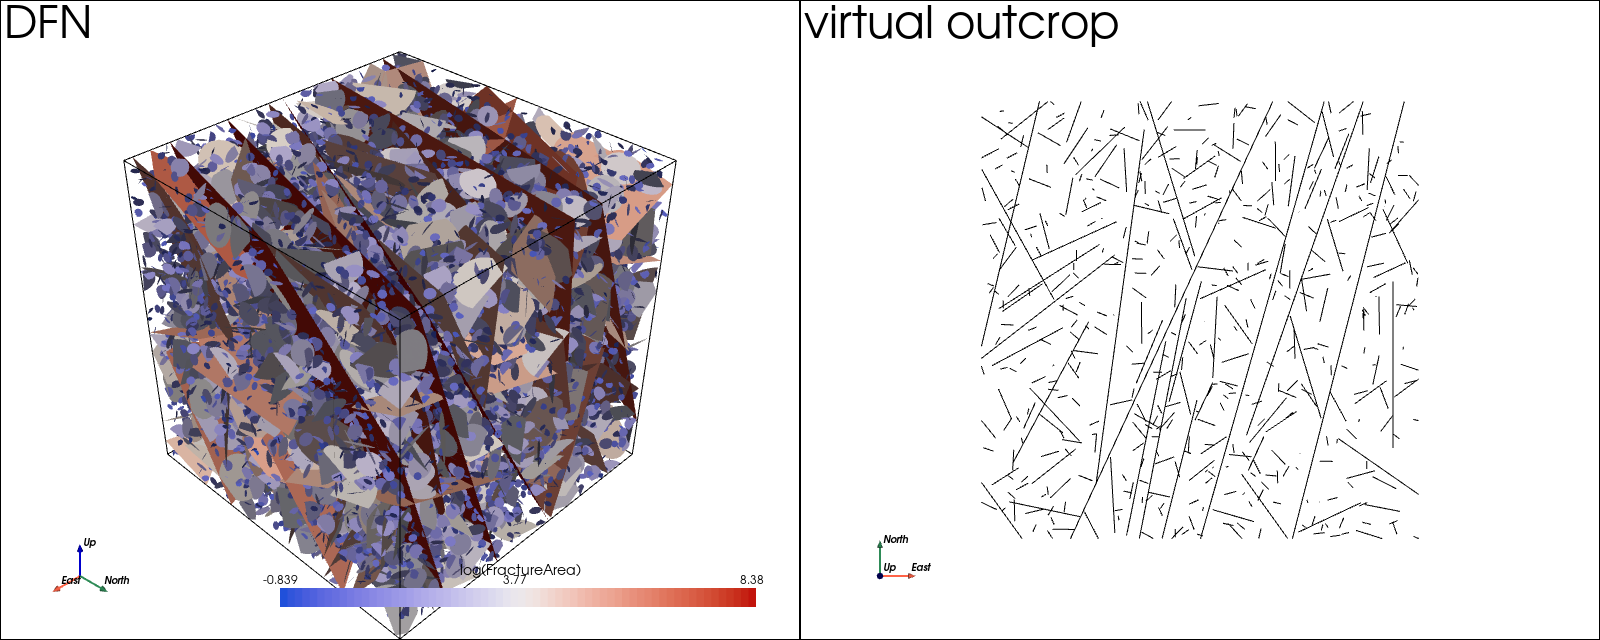

In [11]:
from sources.functions import plot_dfn_and_slice
plot_dfn_and_slice(system,"FractureArea",log=True)

Size distribution.

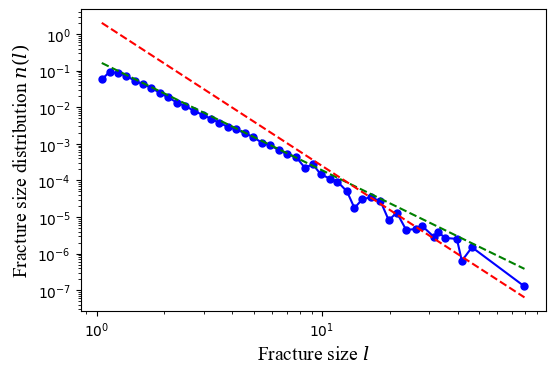

In [12]:
from sources.functions import plot_size_distribution_ufm
plot_size_distribution_ufm(system,nbin=60,nrate=0.19,C=1,a=3,alphaU=2.5)

_____________
## Comparison with an equivalent stochastic DFN

You can compare your UFM network with an equivalent stochastic DFN by randomizing positions in the system domain (and thus breaking correlations between fractures).

In [13]:
import dfnlab.Generator as gen 

pgenerator = gen.Generator(system, seed=1001)
pgenerator.setPositionsUniform()
pgenerator.randomizePositions();
system.build()

Visualisation.

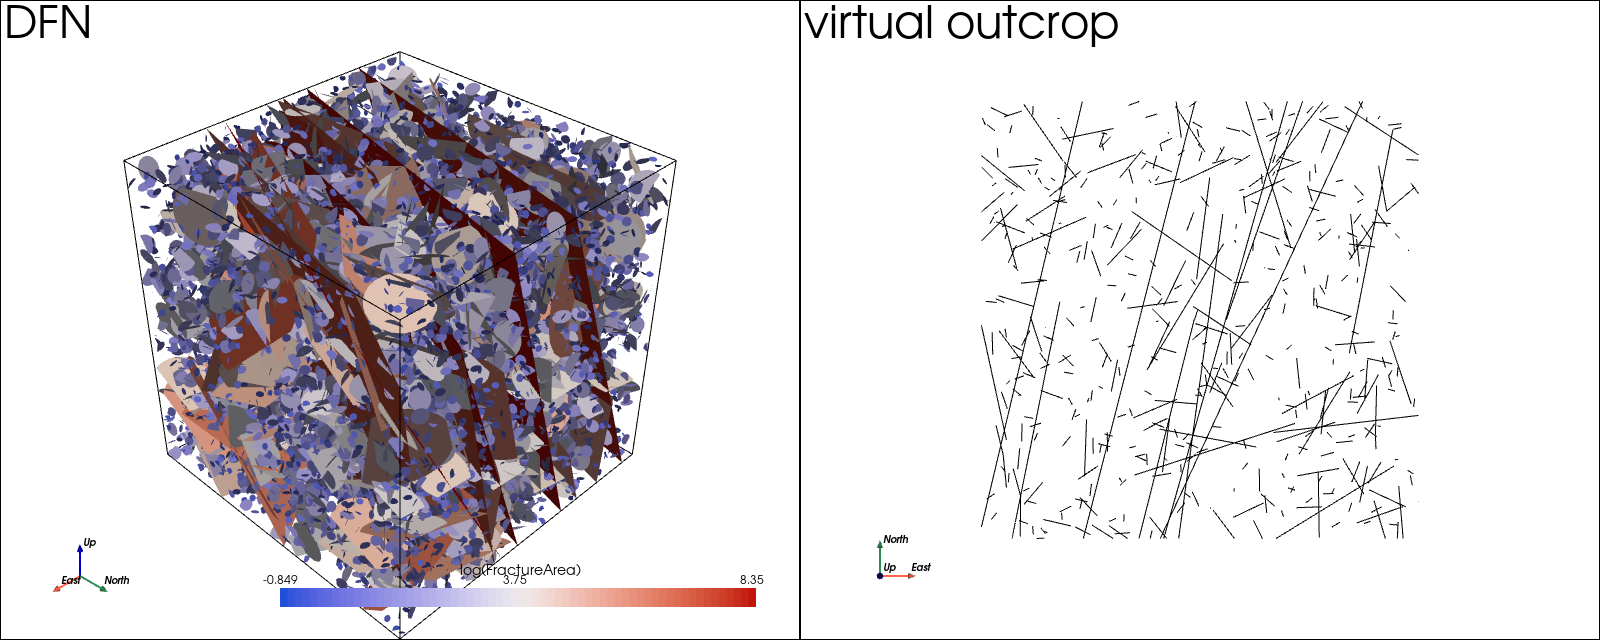

In [14]:
from sources.functions import plot_dfn_and_slice
plot_dfn_and_slice(system,"FractureArea",log=True)

_____________________
## Create a UFM DFN using "target" parameters
You can also create a UFM DFN using "target" parameters (slope of the dilute regime, minimum fracture size, and transition scale between dilute and dense regimes).

In [15]:
import dfnlab.System as sys
import dfnlab.Domains as dom
import dfnlab.Fractures as dfn

system = sys.System()
domain = dom.Domain()
domain.buildParallelepiped(center=[0, 0, 0], L1=60.)
system.setDomain(domain)
fnet = dfn.DFN()
system.setDFN(fnet)

In [16]:
generator = ufmgenerator.UFMGenerator(system, seed=1001)
generator.setNucleiSizeMin(lmin=1) 
generator.setPositionsUniform()
generator.setOrientationsUniform()
generator.setIntersectionParameters(nucleisuppress=3,tlength=0.2,tside=-1,tmode=1)
generator.setGrowthParametersFromTransitionScale(lmin=1, transitionscale=10, growthexponent=3.)

Finally we generate the DFN and build the system

In [17]:
generator.generate();
system.build()

Visualisation

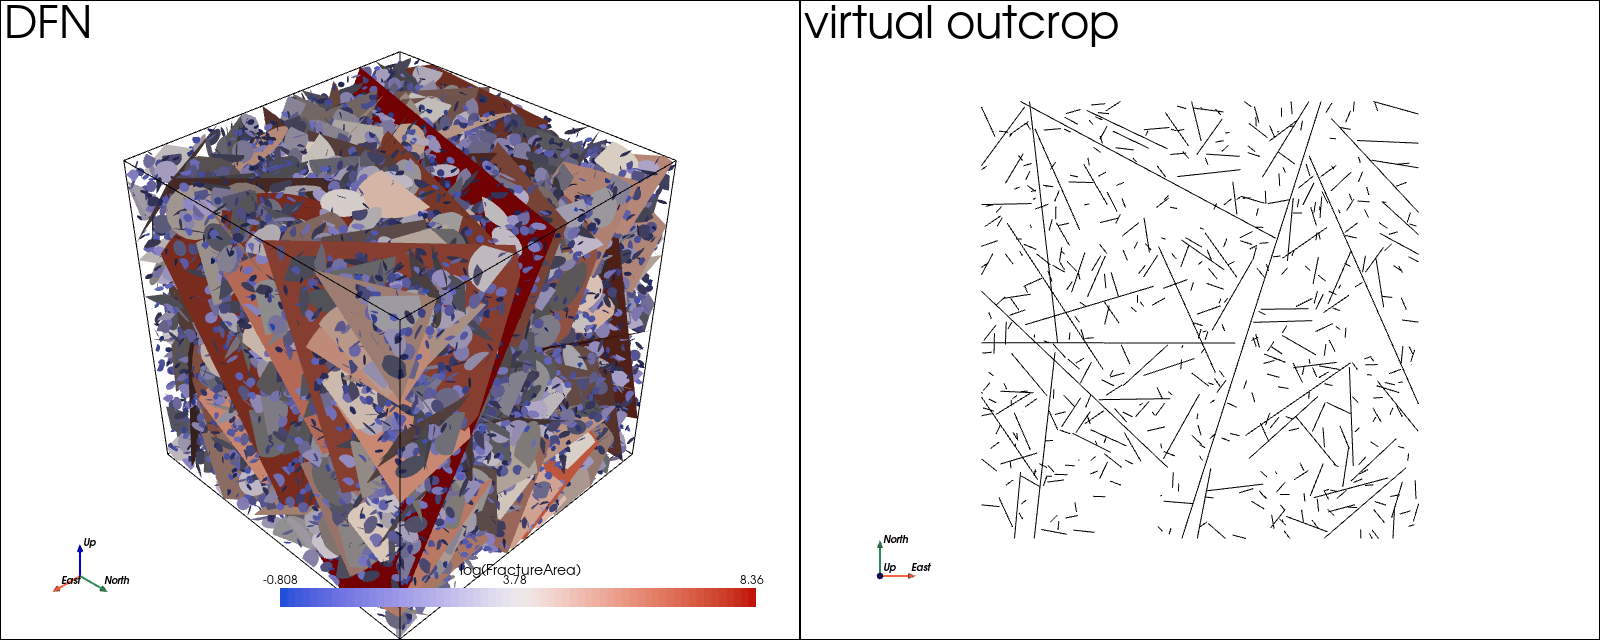

In [18]:
from sources.functions import plot_dfn_and_slice
plot_dfn_and_slice(system,"FractureArea",log=True)

We plot the fracture size distribution below.

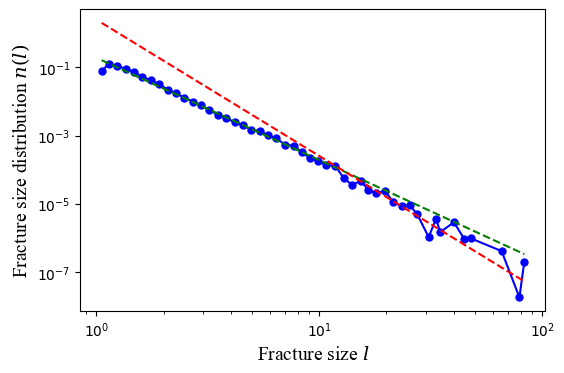

In [19]:
from sources.functions import plot_size_distribution_ufm
plot_size_distribution_ufm(system,nbin=60,nrate=0.19,C=1,a=3,alphaU=2.5)

_____________